### imports

In [45]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle # save data
import glob # find files in a directory
import re # regex for string parsing

### set `folder_name`

In [46]:
folder_name = '../../Data_Copy/ToneDiscrimination/ANA2/'
output_folder = "../../Data_Copy/AnalysisData/ANA2/HitMovements_ANA2/"
!mkdir {output_folder}

### sort all relevant .mat files found in folder by day ("_d#")

In [47]:
unsorted_matfiles = glob.glob(folder_name+'*_d*.mat')
sorted_matfiles = sorted(unsorted_matfiles, key=lambda x: int(re.search(r'(?<=d)[^_.]+(?=[_.])',x).group()))
# check
sorted_matfiles

['../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_ANA2_20231023_d2.mat',
 '../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_ANA2_20231023_d2_b.mat',
 '../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_ANA2_20231024_d3.mat',
 '../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_ANA2_20231027_d4.mat',
 '../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_ANA2_20231030_d5.mat',
 '../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_ANA2_20231101_d6_c.mat',
 '../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_ANA2_20231101_d6_b.mat',
 '../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_ANA2_20231101_d6.mat',
 '../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_ANA2_20231102_d7.mat']

### Get the rxn time means and vars
- loop through days, get `respMTX` (information for each of the trials) for that day
- loop through all trials in that day's `respMTX`
- Get the mean and vars of `rxn_ts` across all those trials and store them in `rxn_ts_means_vars`

In [48]:
# initialize empty output array
rxn_ts_means_vars = pd.DataFrame(columns=['mat_file_name', 'rxn_ts_mean', 'rxn_ts_var'])

# loop through all .mat files found in folder as sessions
for mat_file_i, mat_file in enumerate(sorted_matfiles): 
    # load `data` from .mat file and split into `params` and `response`
    loaded_matfile = io.loadmat(mat_file)

    data = loaded_matfile['data'][0][0]
    params = data[0][0][0]
    response = data[1][0][0]

    # get `respMTX` (trials) from response
    respMTX = response[2]
    num_trials = respMTX.shape[0]

    # Actual rxt time analysis:
    # Loop through each trial and get `rxn_ts` (s) and the mean and variance for that
    rxn_ts = []
    for trial_i in range(0, num_trials):
        trial_respMTX = respMTX[trial_i]

        tone_t = trial_respMTX[1]
        lever_press_t = trial_respMTX[3]
        rxn_ts.append(lever_press_t - tone_t)

    # ignore NaN values from trials where mouse pressed lever during foreperiod or there was no lever press
    rxn_ts_var = np.nanvar(rxn_ts)
    rxn_ts_mean = np.nanmean(rxn_ts)

    # add these to the final output array
    rxn_ts_means_vars.at[mat_file_i, 'mat_file_name'] = mat_file
    rxn_ts_means_vars.at[mat_file_i, 'rxn_ts_mean'] = rxn_ts_mean
    rxn_ts_means_vars.at[mat_file_i, 'rxn_ts_var'] = rxn_ts_var

/var/folders/r7/8qfxhsfs03nbp3j_6k4vgz600000gn/T/ipykernel_1704/638540873.py:28: RuntimeWarning: Degrees of freedom <= 0 for slice.
  rxn_ts_var = np.nanvar(rxn_ts)
/var/folders/r7/8qfxhsfs03nbp3j_6k4vgz600000gn/T/ipykernel_1704/638540873.py:29: RuntimeWarning: Mean of empty slice
  rxn_ts_mean = np.nanmean(rxn_ts)


preview the output `rxn_ts_means_vars`


`rxn_ts_means_vars`: 3 columns

String, mat_file_name | num, mean | num, var

In [49]:
rxn_ts_means_vars

,mat_file_name,rxn_ts_mean,rxn_ts_var
0,../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_...,7.219717,68.021143
1,../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_...,NaN,NaN
2,../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_...,9.119493,64.280137
3,../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_...,11.376775,63.418041
4,../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_...,1.977755,1.805745
5,../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_...,4.375874,9.025347
6,../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_...,4.790688,10.374651
7,../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_...,5.671051,8.242983
8,../Data_Copy/ToneDiscrimination/ANA2/ToneDisc_...,4.317692,9.58858


### Save `rxn_ts_means_vars` into a .pickle file in the same folder

In [50]:
with open(output_folder+'rxn_ts_means_vars.pickle', 'wb') as handle:
    pickle.dump(rxn_ts_means_vars, handle, protocol=pickle.HIGHEST_PROTOCOL)

### plot rxn_t means and vars over days and save the figure plots as .pngs in the folder

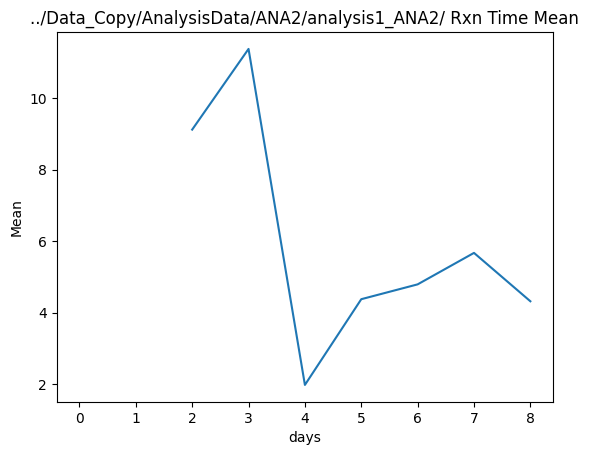

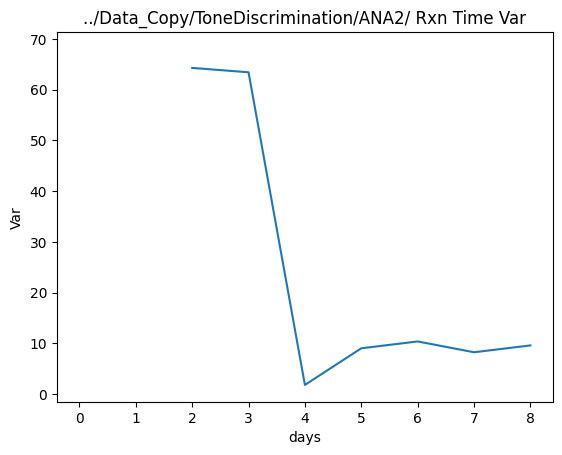

In [51]:
plt.plot(range(0, len(sorted_matfiles)), rxn_ts_means_vars['rxn_ts_mean'])
plt.title(output_folder + " Rxn Time Mean")
plt.xlabel("days")
plt.ylabel("Mean")
plt.savefig(folder_name + "rxn_ts_mean" + ".png")
plt.show()

plt.plot(range(0, len(sorted_matfiles)), rxn_ts_means_vars['rxn_ts_var'])
plt.title(folder_name + " Rxn Time Var")
plt.xlabel("days")
plt.ylabel("Var")
plt.savefig(output_folder + "rxn_ts_var" +".png")
plt.show()